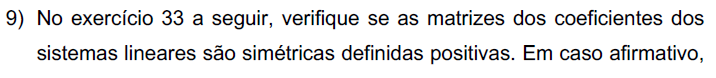
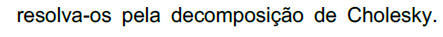

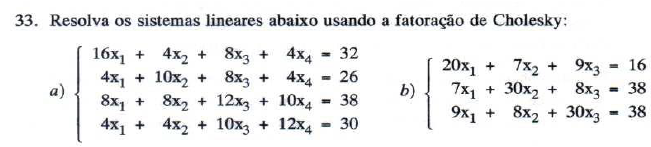

In [1]:
import numpy as np

In [2]:
a = np.array([
    [16,4,8,4],
    [4,10,8,4],
    [8,8,12,10],
    [4,4,10,12]
])

b =  np.array([
    [20,7,9],
    [7,30,8],
    [9,8,30]
])

In [3]:
k,n = a.shape
for i in range(n-1):
    determinante = np.linalg.det(a)
    if determinante > 0:
        print(determinante,">0")
    else:
        print(determinante,"<=0")
    a = a[:-1,:-1]
    print(a)

576.0000000000001 >0
[[16  4  8]
 [ 4 10  8]
 [ 8  8 12]]
576.0000000000001 >0
[[16  4]
 [ 4 10]]
144.0 >0
[[16]]


In [4]:
k,n = b.shape
for i in range(n-1):
    determinante = np.linalg.det(b)
    if determinante > 0:
        print(determinante,">0")
    else:
        print(determinante,"<=0")
    b = b[:-1,:-1]
    print(b)

13828.000000000004 >0
[[20  7]
 [ 7 30]]
551.0000000000002 >0
[[20]]


#### Ambas são matrizes definidas positivas

In [5]:
def decomposicaoCholesky(A):
    print("input = A",A)
    n,c = A.shape
    G = np.zeros(n**2).reshape(n,n)
    
    for k in range(n):
        s=0
        for i in range(k):
            s = s + G[k][i]**2
        s= A[k][k] - s
        if s<=0:
            print("não positiva")
            return []
        
        G[k][k] = np.sqrt(s)
        print("G[k][k] = ",G[k][k],"k=",k,)
        for j in range(k,n):
            s=0
            for i in range(k):
                s = s + G[j][i]*G[k][i]
                print("G[j][i] = ",G[j][i],"G[k][i]",G[k][i],"k=",k,"i=",i,"j=",j)
                
            G[j][k] = (A[j][k]-s)/G[k][k]
            print("*G[j][k] = ",G[j][k],"A[j][k]",A[j][k],"k=",k,"j=",j)
    return G

In [6]:
a = np.array([
    [16,4,8,4],
    [4,10,8,4],
    [8,8,12,10],
    [4,4,10,12]
])
G = decomposicaoCholesky(a)
GLinha = np.linalg.cholesky(a)

input = A [[16  4  8  4]
 [ 4 10  8  4]
 [ 8  8 12 10]
 [ 4  4 10 12]]
G[k][k] =  4.0 k= 0
*G[j][k] =  4.0 A[j][k] 16 k= 0 j= 0
*G[j][k] =  1.0 A[j][k] 4 k= 0 j= 1
*G[j][k] =  2.0 A[j][k] 8 k= 0 j= 2
*G[j][k] =  1.0 A[j][k] 4 k= 0 j= 3
G[k][k] =  3.0 k= 1
G[j][i] =  1.0 G[k][i] 1.0 k= 1 i= 0 j= 1
*G[j][k] =  3.0 A[j][k] 10 k= 1 j= 1
G[j][i] =  2.0 G[k][i] 1.0 k= 1 i= 0 j= 2
*G[j][k] =  2.0 A[j][k] 8 k= 1 j= 2
G[j][i] =  1.0 G[k][i] 1.0 k= 1 i= 0 j= 3
*G[j][k] =  1.0 A[j][k] 4 k= 1 j= 3
G[k][k] =  2.0 k= 2
G[j][i] =  2.0 G[k][i] 2.0 k= 2 i= 0 j= 2
G[j][i] =  2.0 G[k][i] 2.0 k= 2 i= 1 j= 2
*G[j][k] =  2.0 A[j][k] 12 k= 2 j= 2
G[j][i] =  1.0 G[k][i] 2.0 k= 2 i= 0 j= 3
G[j][i] =  1.0 G[k][i] 2.0 k= 2 i= 1 j= 3
*G[j][k] =  3.0 A[j][k] 10 k= 2 j= 3
G[k][k] =  1.0 k= 3
G[j][i] =  1.0 G[k][i] 1.0 k= 3 i= 0 j= 3
G[j][i] =  1.0 G[k][i] 1.0 k= 3 i= 1 j= 3
G[j][i] =  3.0 G[k][i] 3.0 k= 3 i= 2 j= 3
*G[j][k] =  1.0 A[j][k] 12 k= 3 j= 3


In [7]:
G

array([[4., 0., 0., 0.],
       [1., 3., 0., 0.],
       [2., 2., 2., 0.],
       [1., 1., 3., 1.]])

In [8]:
GLinha

array([[4., 0., 0., 0.],
       [1., 3., 0., 0.],
       [2., 2., 2., 0.],
       [1., 1., 3., 1.]])

In [9]:
b =  np.array([
    [20,7,9],
    [7,30,8],
    [9,8,30]
])
G = decomposicaoCholesky(b)
GLinha = np.linalg.cholesky(b)

input = A [[20  7  9]
 [ 7 30  8]
 [ 9  8 30]]
G[k][k] =  4.47213595499958 k= 0
*G[j][k] =  4.47213595499958 A[j][k] 20 k= 0 j= 0
*G[j][k] =  1.5652475842498528 A[j][k] 7 k= 0 j= 1
*G[j][k] =  2.0124611797498106 A[j][k] 9 k= 0 j= 2
G[k][k] =  5.248809388804284 k= 1
G[j][i] =  1.5652475842498528 G[k][i] 1.5652475842498528 k= 1 i= 0 j= 1
*G[j][k] =  5.2488093888042835 A[j][k] 30 k= 1 j= 1
G[j][i] =  2.0124611797498106 G[k][i] 1.5652475842498528 k= 1 i= 0 j= 2
*G[j][k] =  0.9240190757060173 A[j][k] 8 k= 1 j= 2
G[k][k] =  5.009609640254557 k= 2
G[j][i] =  2.0124611797498106 G[k][i] 2.0124611797498106 k= 2 i= 0 j= 2
G[j][i] =  0.9240190757060173 G[k][i] 0.9240190757060173 k= 2 i= 1 j= 2
*G[j][k] =  5.009609640254558 A[j][k] 30 k= 2 j= 2


In [10]:
G

array([[4.47213595, 0.        , 0.        ],
       [1.56524758, 5.24880939, 0.        ],
       [2.01246118, 0.92401908, 5.00960964]])

In [11]:
GLinha

array([[4.47213595, 0.        , 0.        ],
       [1.56524758, 5.24880939, 0.        ],
       [2.01246118, 0.92401908, 5.00960964]])

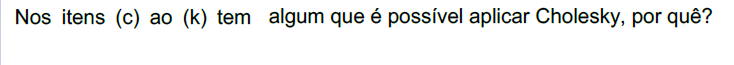

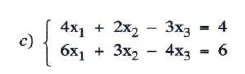
#### Resposta c)
Nesse caso não é possível pois a matriz não é quadrada A(nxn)

#### Resposta d)
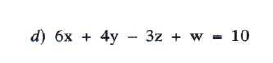
Nesse caso não é possível pois a matriz não é quadrada A(nxn)

#### Resposta e)
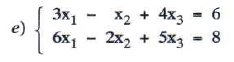
Nesse caso não é possível pois a matriz não é quadrada A(nxn)

#### Resposta f)
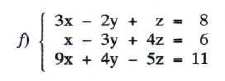
Nesse caso não é possível pois possui coeficientes negativos na diagonal principal

#### Resposta g)
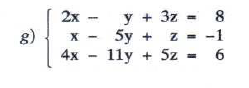
Nesse caso não é possível pois possui coeficientes negativos na diagonal principal

#### Resposta h)
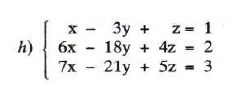
Nesse caso não é possível pois possui coeficientes negativos na diagonal principal

#### Resposta i)
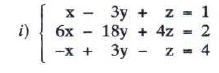
Nesse caso não é possível pois possui coeficientes negativos na diagonal principal

#### Resposta j)
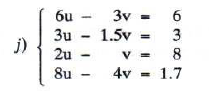
Nesse caso não é possível pois a matriz não é quadrada A(nxn)

#### Resposta k)
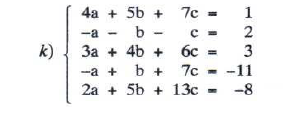
Nesse caso não é possível pois a matriz não é quadrada A(nxn)